#데이터 정제: 데이터 기초통계 확인 및 결측치 제거

In [316]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [318]:
df = pd.read_csv('superstore.csv')
df
#결측치 제거 및 칼럼 확인 
df.drop(columns = ['记录数'], inplace=True)
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [320]:
import pandas as pd

# 주문 날짜와 배송 날짜(문자열)을 datetime으로 변환하여 배송소요시간 칼럼 추가
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

# 시간 차이 계산
df['Shipping.Duration'] = df['Ship.Date'] - df['Order.Date']

print(df[['Order.Date', 'Ship.Date', 'Shipping.Duration']])
print(type(df['Shipping.Duration'][0]))  # <class 'pandas._libs.tslibs.timedeltas.Timedelta'>

df['Shipping.Duration.Days'] = df['Shipping.Duration'].dt.days
print(df[['Shipping.Duration', 'Shipping.Duration.Days']])

      Order.Date  Ship.Date Shipping.Duration
0     2011-01-07 2011-01-09            2 days
1     2011-01-21 2011-01-26            5 days
2     2011-08-05 2011-08-09            4 days
3     2011-08-05 2011-08-09            4 days
4     2011-09-29 2011-10-03            4 days
...          ...        ...               ...
51285 2014-12-03 2014-12-04            1 days
51286 2014-12-03 2014-12-04            1 days
51287 2014-12-18 2014-12-21            3 days
51288 2014-12-25 2014-12-26            1 days
51289 2014-12-26 2014-12-30            4 days

[51290 rows x 3 columns]
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
      Shipping.Duration  Shipping.Duration.Days
0                2 days                       2
1                5 days                       5
2                4 days                       4
3                4 days                       4
4                4 days                       4
...                 ...                     ...
51285            1 days            

# 매출액과, 이익액과 독립변수(판매량, 할인율, 배송비, 배송소요시간)간의 상관관계 시각화
- 매출과 이익은 양의 상관관계 (0.4849) → 매출이 증가하면 이익도 증가하는 경향.
- 할인율과 이익은 음의 상관관계 (-0.3165) → 할인율이 높을수록 이익이 줄어드는 경향.
- 판매량과 매출은 양의 상관관계 (0.3136) → 많이 팔수록 매출 증가 가능.
- Sales ↔ Discount (-0.086)거의 관계 없음 → 할인이 매출 증가에 미치는 영향이 크지 않을 수도 있음.경우에 따라서는 다른 요인이 더 중요할 가능성이 있음.

import pandas as pd

df = pd.read_csv('superstore.csv')
df
#결측치 제거 및 칼럼 확인 
df.drop(columns = ['记录数'], inplace=True)
df.columns

df[['Sales','Discount','Profit','Quantity','Shipping.Cost','Shipping.Duration.Days']].describe()

In [344]:
#할인 이익 상관관계 -> 음의 상관관계 (할인율이 높이질수록, 이익은 낮아지지만 -0.31이므로 상관관계가 크지 않음 -> 회귀분석 필요)
corr=np.corrcoef(df.Profit,df.Discount)
print(corr)

[[ 1.         -0.31649017]
 [-0.31649017  1.        ]]


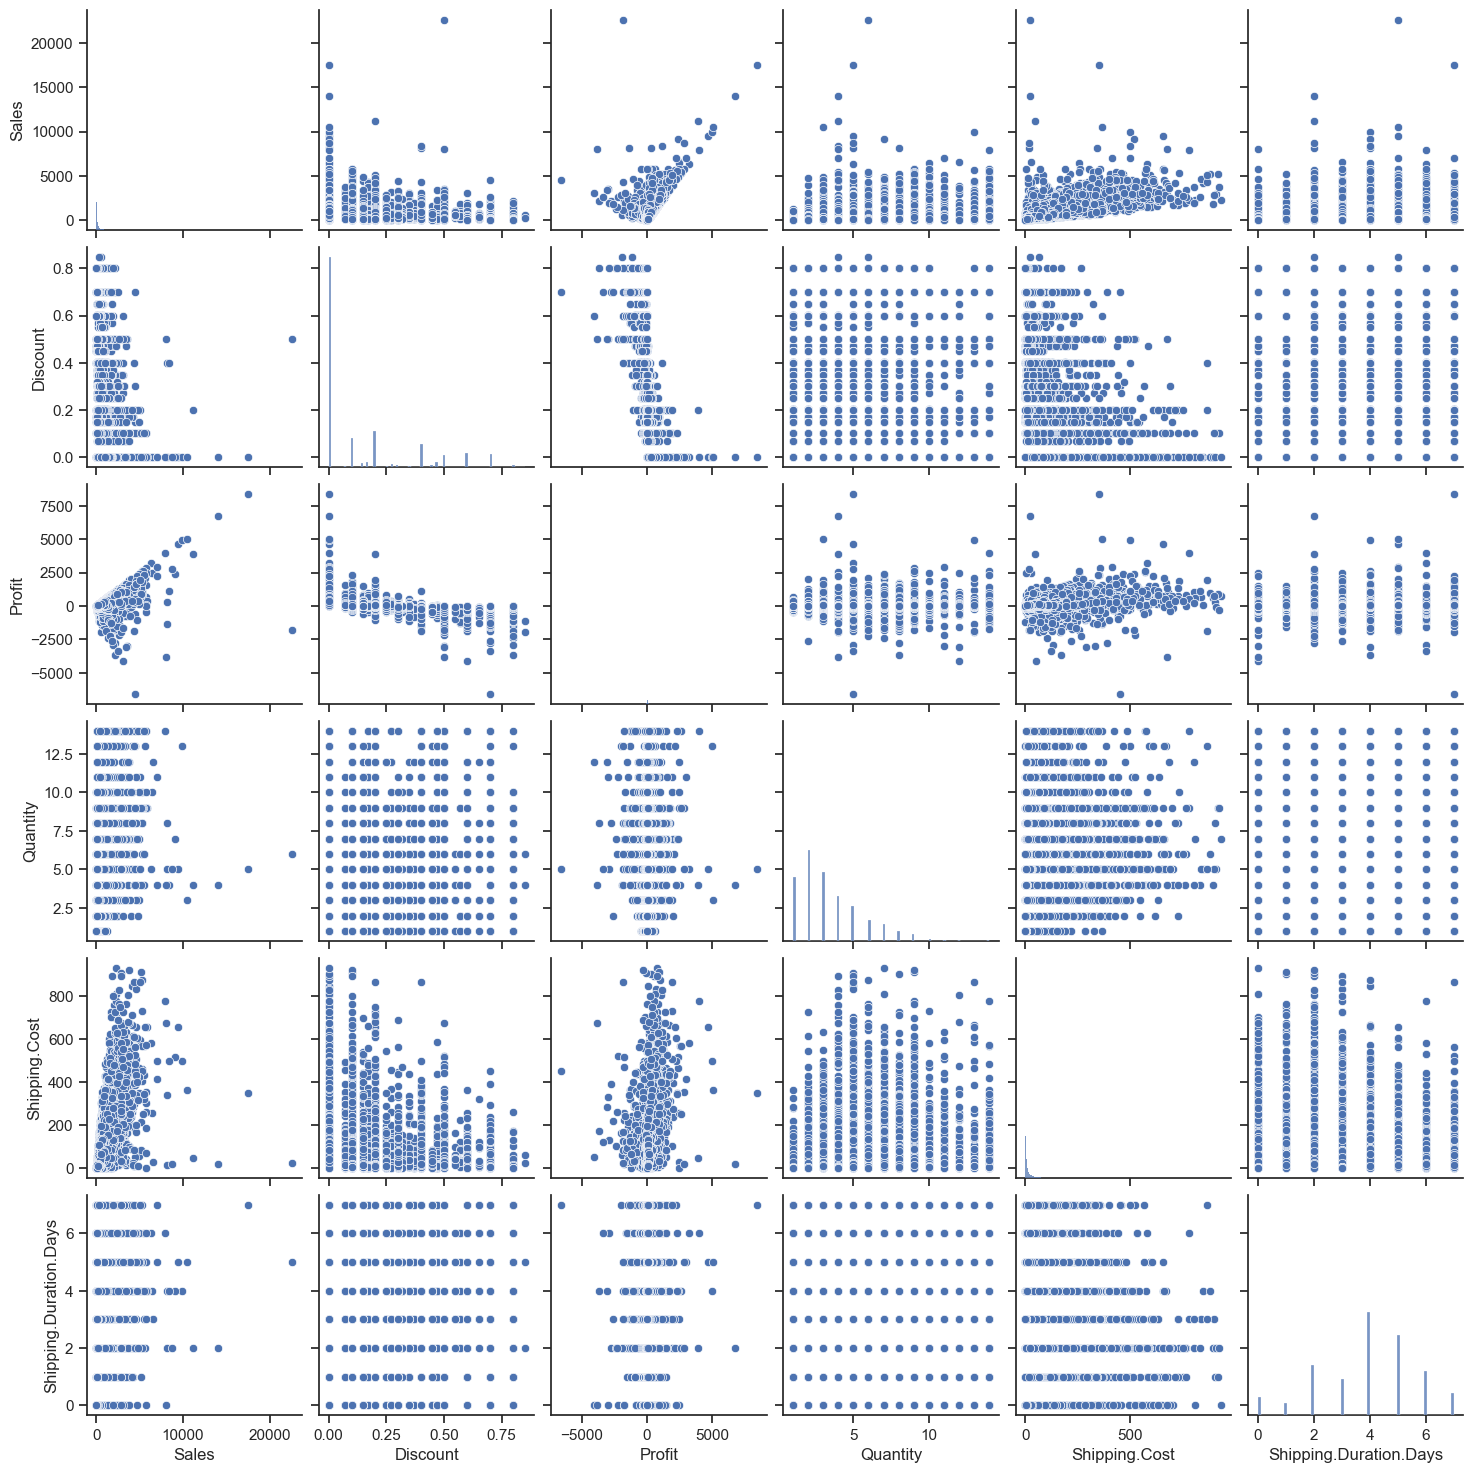

In [346]:
import seaborn as sns

cols=['Sales','Discount','Profit','Quantity','Shipping.Cost','Shipping.Duration.Days']
df2=df[cols]

sns.set(style='ticks')
sns.pairplot(df2)

In [347]:
#상관계수 출력 
df2.corr()

,Sales,Discount,Profit,Quantity,Shipping.Cost,Shipping.Duration.Days
Sales,1.000000,-0.086728,0.484923,0.313580,0.768075,-0.004661
Discount,-0.086728,1.000000,-0.316490,-0.019875,-0.079055,-0.001507
Profit,0.484923,-0.316490,1.000000,0.104365,0.354441,0.001745
Quantity,0.313580,-0.019875,0.104365,1.000000,0.272649,0.004347
Shipping.Cost,0.768075,-0.079055,0.354441,0.272649,1.000000,-0.142823
Shipping.Duration.Days,-0.004661,-0.001507,0.001745,0.004347,-0.142823,1.000000


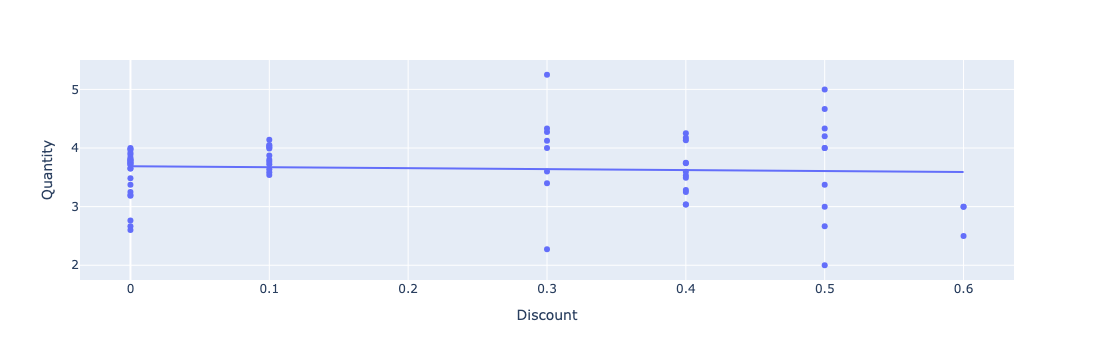

In [384]:
ddimport plotly.express as px
import pandas as pd 

df = pd.read_csv('superstore.csv')
df_copy = df[['Year','Country', 'Category', 'Sales', 'Discount', 'Quantity' ,'Profit']].copy()

aus_china = df_copy[(df.Country=='Australia') | (df.Country=='China')]
aus_china_sp = aus_china.groupby(['Year', 'Country', 'Category','Discount'])[['Quantity','Sales', 'Profit']].mean().reset_index().sort_values('Year')
countries = aus_china_sp['Country'].unique()
categories = aus_china_sp['Category'].unique()

fig = px.scatter(aus_china_sp, x= 'Discount', y= 'Quantity', trendline='ols')
fig.show()
